# CAR PRICE ANALYSIS


As an analyst at Crankshaft List website where hundreds of free advertisements for vehicles are published every day,

I will study the data collected over the last few years and determine which factors influence the price of a vehicle. 

### Table of Contents
* <a href="#Step 1">Opening the Data</a><br>
    * <a href="#car_tail">car_sales tail</a><br>
    * <a href="#car_shape">Car_sales shape</a><br>
    * <a href="#car_columns">Car columns</a><br>
    * <a href="#car_info">Car Info</a><br>
    * <a href="#car_describe">Car describe</a><br>
        * <a href="#step1_conclusion">Conclusion</a><br>
* <a href="#Step 2">Data preprocessing</a><br>
    * <a href="#checkingfor nan">Checking for Nan Values</a><br>
    * <a href="#frequency replacement">Replacement by frequency</a><br>
    * <a href="#Real2int">Changing Real number to Int</a><br>
        * <a href="#Step2conclusion">Conclusion</a><br>
* <a href="#Step 3">Make calculations and add them to the table</a><br>
    * <a href="#Datetime64">Adding week, month and year column</a><br>
    * <a href="#carAge">Adding the age of the car</a><br>
    * <a href="#carMilage">Adding the Average milage of the car</a><br>
    * <a href="#condition2numeric">Replacing the condition value to Numeric</a><br>
    * <a href="#condition2numeric">Replacing the condition value to Numeric</a><br>
        * <a href="#Step3conclusion">Conclusion</a><br>
* <a href="#Step 4">Carry out exploratory data analysis</a><br>
    * <a href="#carsalesboxplot">Checking the age column upper limit</a><br>
    * <a href="#agefiltered">filtered age column</a><br>
    * <a href="#priceupperlimit">Checking the price column upper limit</a><br>
    * <a href="#pricefiltered">filtered price column</a><br>
    * <a href="#odometerupperlimit">Checking the odometer column upper limit</a><br>
    * <a href="#odometerfiltered">filtered odometer column</a><br>
    * <a href="#cylinderupperlimit">Checking the cylinder column upper limit</a><br>
    * <a href="#conditioncount">Condition column value count</a><br>
    * <a href="#dayslistedhist">Days Listed histogram</a><br>
    * <a href="#Adbyprice">number of ad and the average price</a><br>
    * <a href="#3colhist">Hist of columns price, days listed and type</a><br>
    * <a href="#translhist">analysis of transmission column</a><br>
    * <a href="#painthist">analysis of paint column</a><br>
        * <a href="#step4conclusion">Conclusion</a><br>
* <a href="#Step 5">Overall conclusion</a><br>       

<p><a name="Step 1"></a></p>

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Making a list of missing value types
car_sales = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 3/vehicles_us (3).csv')

print(car_sales.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


<p><a name="car_tail"></a></p>

In [3]:
print(car_sales.tail())

       price  model_year           model  condition  cylinders fuel  odometer  \
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
51520    automatic  sedan       black     NaN  2018-10-03           37  
51521    automatic  sedan       white     NaN  2018-11-14           22  
51522    automatic  sedan        blue     NaN  2018-11-15           32  
51523    automatic  sedan       black     NaN  2018-07-02           71  
51524    automatic  sedan         NaN     NaN  2018-06-05           10  


<p><a name="car_shape"></a></p>

In [4]:
#im calling the shape function to see how many row and columns the data set contains.

car_sales.shape

(51525, 13)

<p><a name="car_columns"></a></p>

In [5]:
# im calling columns function to see what are the column names
car_sales.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

<p><a name="car_info"></a></p>

In [6]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<p><a name="car_describe"></a></p>

In [7]:
car_sales.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<p><a name="step1_conclusion"></a></p>

### Conclusion
The car_sales dataset has 51525 rows and 13 columns.There are Nan values inplaced in columns 'model_year', 'cylinders', 'odometer','paint_color', and 'is_4wd'.I'm using Pandadictionary since my task involves, data cleaning and data manipulation

<p><a name="Step 2"></a></p>

### Step 2. Data preprocessing

In [8]:
# Total of missing values for each column
print (car_sales.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


<p><a name="checkingfor nan"></a></p>

In [9]:
# checking for the Nan values in model year column.

missing_year = car_sales["model_year"].isna().sum()
total = car_sales.index
number_of_rows = len(total)

In [10]:
# finding out the percentage of Nan values before dropping and replacing them.
missing_year_percentage = missing_year /  number_of_rows

In [11]:
print('the percentage of missing model year in the data:', "{:.2%}". format(missing_year_percentage))

the percentage of missing model year in the data: 7.02%


In [12]:
# getting the median value of the column

median_model_year = car_sales['model_year'].median()

In [13]:
#this is the median value of the column which I will be using to 
#fill up the NaN values.
print(median_model_year)

2011.0


In [14]:
#filling up the Nan values with median by calling the fillna function.

car_sales['model_year'] = car_sales['model_year'].fillna(value= median_model_year)

In [15]:
#Determining the missing value of 'cylinders column and replacing it with median'
cylinders = car_sales["cylinders"].isna().sum()
total = car_sales.index
number_of_rows = len(total)

In [16]:
#getting the median value of the column.

median_cylinder = car_sales['cylinders'].median()

In [17]:
car_sales['cylinders'] = car_sales['cylinders'].fillna(value= median_cylinder)

In [18]:
#Determining the missing value of 'Odometer' column and replacing it with median'
odometer = car_sales["odometer"].isna().sum()
total = car_sales.index
number_of_rows = len(total)

In [19]:
#finding out the percentage of the Nan values in the column.
odometer_percentage = odometer /  number_of_rows

In [20]:
print('the percentage of missing odometers in the data:', "{:.2%}". format(odometer_percentage))

the percentage of missing odometers in the data: 15.32%


In [21]:
# getting the median of the column.
median_odometer = car_sales['odometer'].median()

In [22]:
car_sales['odometer'] = car_sales['odometer'].fillna(value= median_odometer)

I used median to fill the missing value primarily because the number of Nan values in the data is more than 1% of the dataset which is high and usually the best option given this case.

<p><a name="frequency replacement"></a></p>

In [23]:
#Determining the missing value of 'paint color' column and replacinf them with frequency using value_counts function.
paint_color = car_sales["paint_color"].isna().sum()
total = car_sales.index
number_of_rows = len(total)

In [24]:
paint_color_percentage = paint_color /  number_of_rows

In [25]:
print('the percentage of missing paint_color in the data:', "{:.2%}". format(paint_color_percentage))

the percentage of missing paint_color in the data: 17.99%


In [26]:
# in the case of paint_color im using value_counts function to get the most number of frequency to replace 
# the missing value since its not a numerical value.

print(car_sales['paint_color'].value_counts())

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


In [27]:
# im replacing the missing value with 'white'
car_sales["paint_color"].fillna("white", inplace = True)

In [28]:
print(car_sales.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500      2011.0      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas  113000.0   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV       white     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup       white     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


In [29]:
#Determining the missing values 'is_4wd' column
count = car_sales["is_4wd"].isna().sum()

In [30]:
print(count)

25953


In this case of column is_4wd where 25953 values are missing, the Nan values indicates that the car is not 4 wheel drive so therefore i will replace it with 0.

In [31]:
#first i have to convert Nan values to 0
car_sales["is_4wd"].fillna("0", inplace = True)


<p><a name="Real2int"></a></p>

In [32]:
#Since the columns 'model_year', 'cylinders' and odometer contains real number,I will change it to integer
# by calling the astype function for the particular columns.I'm using this function for its versatility to go 
# one type to another in a dataframe.

car_sales = car_sales.astype({"model_year": int, "cylinders": int, "odometer": int, "is_4wd" : int})

In [33]:
print(car_sales.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    113000   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV       white       1  2018-06-23           19  
1    automatic  pickup       white       1  2018-10-19           50  
2    automatic   sedan         red       0  2019-02-07           79  
3    automatic  pickup       white       0  2019-03-22            9  
4    automatic   sedan       black       0  2019-04-02           28  


In [34]:
# i call info to check if the data set has no longer Nan values and the data types are in correct form.
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  int32 
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int32(4), int64(2), object(7)
memory usage: 4.3+ MB


<p><a name="Step2conclusion"></a></p>

### Conclusion

The dataset that contain Nan values in columns model_year, cylinders, odometer and paint_color this is because the person who posted the ad did not fill up the information being ask or the information is not available due to damage part like odometer., while in is_4wd column the value Nan value indicates that the vehicle is not 4wd and is therefore shoul be change to 0 from Nan.

<p><a name="Step 3"></a></p>

### Step 3. Make calculations and add them to the table

In [35]:
#I have to calculate and add in the table the time data in the 'date_posted' column by converting it from a 
#string type to datetime64.

car_sales['date_posted']= pd.to_datetime(car_sales['date_posted'], format = '%Y-%m-%dT%H:%M')

<p><a name="Datetime64"></a></p>

In [36]:
#I will add the weekday,'month' and year column to the table
car_sales['day_of_week'] = pd.DatetimeIndex(car_sales['date_posted']).weekday
car_sales['month'] = pd.DatetimeIndex(car_sales['date_posted']).month 
car_sales['year'] = pd.DatetimeIndex(car_sales['date_posted']).year

In [37]:
#calculating the car age and adding them in the table
car_age =  car_sales['year'] - car_sales['model_year'] 

<p><a name="carAge"></a></p>

In [38]:
# Adding the column 'age' in the table
car_sales['age']= car_age

In [39]:
#calculating the average milage per year and adding them in the table
average_milage =  car_sales['odometer'] / car_sales['age']

<p><a name="carMilage"></a></p>

In [40]:
# adding the milage per year of the car in the table.
car_sales['average_milage'] = average_milage

<p><a name="condition2numeric"></a></p>

In [41]:
#Replacing 'condition' column to numeric value
condition = car_sales['condition'].replace(to_replace = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], value = ['5', '4', '3', '2', '1', '0' ])

In [42]:
#Achanging  the 'condition' column of the car in the table
car_sales['condition'] = condition

In [43]:
print(car_sales.head())

   price  model_year           model condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5         2          6  gas    145000   
1  25500        2011      ford f-150         2          6  gas     88705   
2   5500        2013  hyundai sonata         4          4  gas    110000   
3   1500        2003      ford f-150         1          8  gas    113000   
4  14900        2017    chrysler 200         3          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV       white       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup       white       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

   day_of_week  month  year  age  average_milage  
0            5      6  2018    7    20714.285714  
1            4

In [44]:
# im calling the value counts of average_milage to see if the outliers in the has effect of the computation of milage
car_sales['average_milage'].value_counts()

inf             2126
1.614286e+04     927
2.260000e+04     592
1.412500e+04     572
1.883333e+04     544
                ... 
1.804860e+04       1
3.491925e+04       1
2.360350e+04       1
2.009533e+04       1
1.845333e+04       1
Name: average_milage, Length: 22691, dtype: int64

there are inf values in average milage column. inf  is the result of a numerical calculation that is mathematically infinite, such as: 1/0 → INF in this case this is the direct effect of odometers that has 0 values.

<p><a name="Stepconclusion"></a></p>

### Conclusion

The columns day of the week, month and year has been added and the column age and average milage has been calculated and also added in the table.

<p><a name="Step 4"></a></p>

### Step 4. Carry out exploratory data analysis

To remove statistical outliers, it is helpful to visualize the data to estimate the outliers.

max:  110
min: 0
mean: 8.469228529839883
median: 7.0


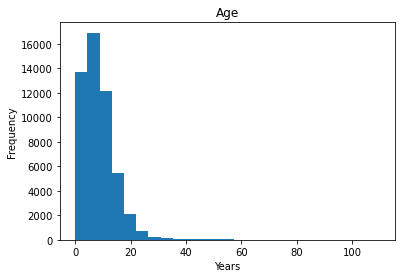

In [45]:
#invistegating the age of cars for resale

car_sales['age'].plot.hist(bins=25)
plt.title('Age')
plt.xlabel('Years')

print("max: ", car_sales['age'].max())
print("min:", car_sales['age'].min())
print("mean:", car_sales['age'].mean())
print("median:", car_sales['age'].median())

the average numbers of cars for resale are 7-9 years old, the 110 value in age is seem to be odd and is considered to be outlier.

<p><a name="carsalesboxplot"></a></p>

The lower limit: 4.0
The upper limit: 24.0


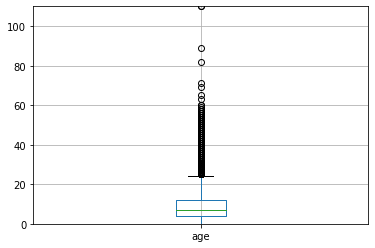

In [46]:
#calling the boxplot to determine the upperlimits of outliers
car_sales.boxplot('age')
plt.ylim(0, 110)

Q1 = car_sales['age'].quantile(0.25)
Q3 = car_sales['age'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

The lower whisker starts at 0, the minimum value, and the upper limit one ends at about 24, which is 1.5 IQR above the third quartile. That is the approximate border of the "typical" range. Everything beyond it can usually be considered an outlier.

<p><a name="agefiltered"></a></p>

In [47]:
#filter the age column of the data by removing the outliers in the age column.

filtered_age = car_sales[car_sales['age'] < 24] 

<AxesSubplot:>

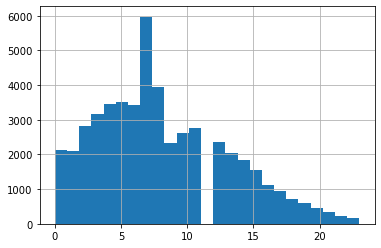

In [48]:
# making histogram of the filtered 'age' column

filtered_age['age'].hist(bins=25)

the filtered 'age' column histogram is easier to read, here we can see that the cars with the highest number being sold are in 7 years age and the older the car gets the less likely it is being sold.

max:  375000
min: 1
mean: 12132.464919941776
median: 9000.0


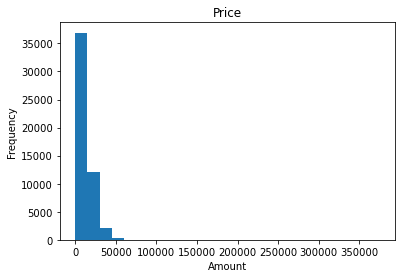

In [49]:
#invistegating the car price

car_sales['price'].plot.hist(bins=25)
plt.title('Price')
plt.xlabel('Amount')
print("max: ", car_sales['price'].max())
print("min:", car_sales['price'].min())
print("mean:", car_sales['price'].mean())
print("median:", car_sales['price'].median())

in this case of the price where median and mean value has big difference is due to the outliers, minimun price value of 1 and maximun value of 375000 is abnormal and is therefore considered outliers which makes the readability of the data hard.

<p><a name="priceupperlimit"></a></p>

The lower limit: 5000.0
The upper limit: 34597.5


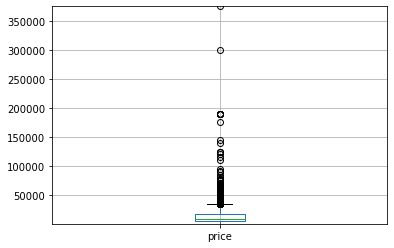

In [50]:
#calling the boxplot to determine the upperlimits of outliers
car_sales.boxplot('price')
plt.ylim(1, 375000)

Q1 = car_sales['price'].quantile(0.25)
Q3 = car_sales['price'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

in the case of price column 34597.5 is the upper limit of outliers and anything beyond it is outliers.

<p><a name="pricefiltered"></a></p>

In [51]:
#filter the price column of the data by removing the outliers in the price column.

filtered_price = filtered_age[filtered_age['price'] < 34597.5] 

Text(0.5, 0, 'Amount')

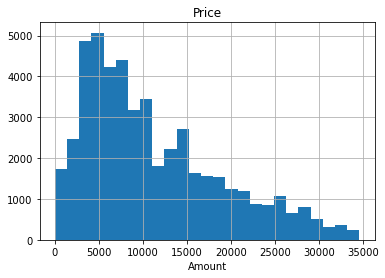

In [52]:
#making histogram of the filtered 'price' column

filtered_price['price'].hist(bins=25)
plt.title('Price')
plt.xlabel('Amount')

here we can see cleary the distribution of price than the previous unfiltered histogram, we can see here that the higher the price the less likely it is being sold in the website and the highest number of cars being sold are at 4000-6000 price range.

max:  990000
min: 0
mean: 115162.3521785541
median: 113000.0


Text(0.5, 0, 'Milage')

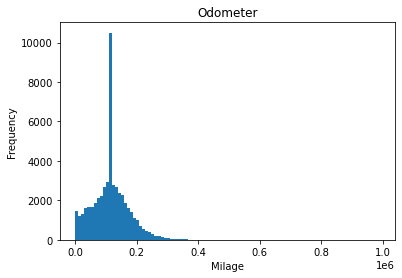

In [53]:
#investigating the milage 
car_sales['odometer'].plot.hist(bins=100)
print("max: ", car_sales['odometer'].max())
print("min:", car_sales['odometer'].min())
print("mean:", car_sales['odometer'].mean())
print("median:", car_sales['odometer'].median())
plt.title('Odometer')
plt.xlabel('Milage')


<p><a name="odometerupperlimit"></a></p>

The lower limit: 79181.0
the upper limit: 247581.0


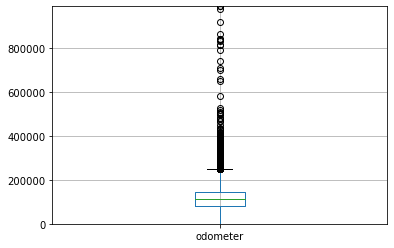

In [54]:
#calling the boxplot to determine the upperlimit of outliers in odometer column

car_sales.boxplot('odometer')
plt.ylim(0, 990000)

Q1 = car_sales['odometer'].quantile(0.25)
Q3 = car_sales['odometer'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('the upper limit:', Q3+1.5*IQR)

in the Odometer column 247581 is the upper limit anything beyond that is considered outlier.

<p><a name="odometerfiltered"></a></p>

In [55]:
#filter the odometer column of the data by removing the outliers in the odometer column.

filtered_milage = filtered_price[filtered_price['odometer'] < 250000] 

for milage we can see that majority of the cars for resale are in range 113k-115k kms.the minimun is 0 and maximun is 990000 which can be considered as outliers.

Text(0.5, 0, 'Milage')

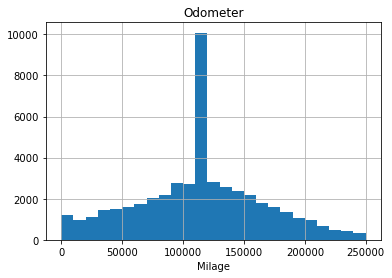

In [56]:
filtered_milage['odometer'].hist(bins=25)
plt.title('Odometer')
plt.xlabel('Milage')

the filtered 'odometer' column is easier to read since there are no more outliers.We notice a sudden climb peak in the number of cars which has 113000 milage. The higher the milage the lower the number of cars being sold.

max:  12
min: 3
mean: 6.112450266860747
median: 6.0


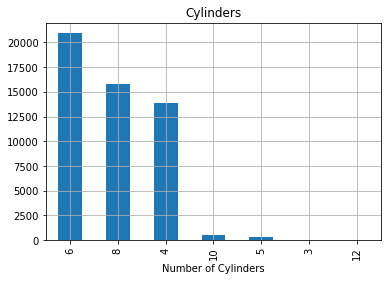

In [57]:
#investigating the cylinders of the cars

car_sales['cylinders'].value_counts().plot(kind= 'bar', grid = True)
plt.show
plt.title('Cylinders')
plt.xlabel('Number of Cylinders')
print("max: ", car_sales['cylinders'].max())
print("min:", car_sales['cylinders'].min())
print("mean:", car_sales['cylinders'].mean())
print("median:", car_sales['cylinders'].median())

most cars being sold are 6 cylinders while having the maximun 12 cylinders seems odd and could possibly be an outlier which is need to be checked.

<p><a name="cylinderupperlimit"></a></p>

The lower limit: 4.0
the upper limit: 14.0


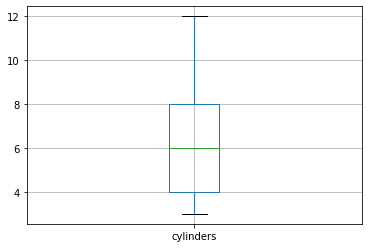

In [58]:
#calling the boxplot to determine the upperlimit of outliers in cylinders column

car_sales.boxplot('cylinders')
Q1 = car_sales['cylinders'].quantile(0.25)
Q3 = car_sales['cylinders'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('the upper limit:', Q3+1.5*IQR)

In this case of cylinders we do not filter the column since there is no value considered outliers.

<p><a name="conditioncount"></a></p>

max:  5
min: 0
median: 3.0


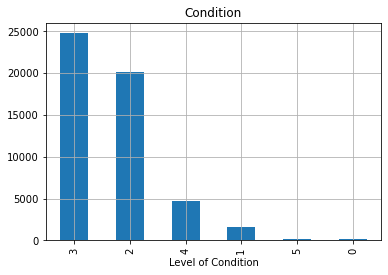

In [59]:
#examining the condition of the vehicles whe the ad was placed
car_sales['condition'].value_counts().plot(kind= 'bar', grid = True)
plt.show
plt.title('Condition')
plt.xlabel('Level of Condition')
print("max: ", car_sales['condition'].max())
print("min:", car_sales['condition'].min())
print("median:", car_sales['condition'].median())

majority of the cars being sold in are in excellent condition and followed by like new condition.

<p><a name="dayslistedhist"></a></p>

max:  271
mean: 39.55475982532751
median: 33.0


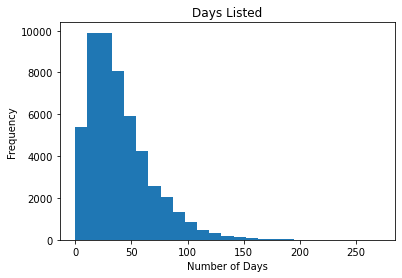

In [60]:
#calculating the max, mean and median of 'days_listed ' column and plotting histogram

car_sales['days_listed'].plot.hist(bins=25)
plt.title('Days Listed')
plt.xlabel('Number of Days')
print("max: ", car_sales['days_listed'].max())
print("mean:", car_sales['days_listed'].mean())
print("median:", car_sales['days_listed'].median())

In [61]:
# divide the number of listing under 1 day by the total number of listing

fast= len(car_sales.query('days_listed < 1')) / len(car_sales)  
print('Removed quickly:',  "{:.2%}". format(fast) )

long= len(car_sales.query('days_listed > 200')) / len(car_sales)
print('Listed long:',  "{:.2%}". format(long) )

Removed quickly: 0.10%
Listed long: 0.07%


The car is typically listed in the website for 33 days, there is 0.10% of car that are removed quikly in the site this happens when the listing has errors and is therefore being removed, and 0.07%  of the listing is considered to be listed abnormally long when was not taken out even if its already sold.

<p><a name="Adbyprice"></a></p>

In [62]:
# analyzing the number of ad and the average price by calling the pivot table function

average_sales =filtered_milage.pivot_table(index='type', values='price', aggfunc='mean')

In [63]:
#analyzing the number of ads per car type and renaming the columns.

car_type= filtered_milage.pivot_table(index='type', values='days_listed', aggfunc=['first','count'])
car_type.columns = ['car_type', 'days_listed']

In [64]:
#combining the 3 columns to get a better view of the data by calling the join function

car_average_sales= car_type.join(average_sales)

In [65]:
print(car_average_sales.sort_values('days_listed', ascending=False).head())

        car_type  days_listed         price
type                                       
sedan         79        11964   6996.876212
SUV           19        11822  10497.212062
truck         64        10986  15228.560259
pickup        50         6209  15168.155742
coupe        101         2009  13554.806371


the sedan vehicle type has the most number of ads with average price of 6996 closely followed by SUV with an average price of 10497.

<p><a name="3colhist"></a></p>

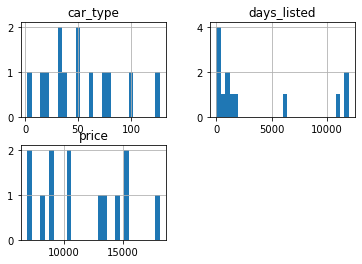

In [66]:
#creating histogram for the 3 particular columns

car_average_sales.hist(bins=30);

The graph shows the hist of the 3 columns car_type, days listed and price, this shows the dependency of car_type to the price of the vehicles.The vehicles that recieve the highest days of listing are sedan and suv.

<p><a name="transhist"></a></p>

In [67]:
# analyzing  the average price for categorical value transmisson by calling the pivot table function
average_transmission =car_sales.pivot_table(index='transmission', values='price', aggfunc='mean')

In [68]:
trans_type= car_sales.pivot_table(index='transmission', values='days_listed', aggfunc=['first','count'])
trans_type.columns = ['count', 'days_listed']

In [69]:
car_trans_type= trans_type.join(average_transmission)

In [70]:
print(car_trans_type.corr())

                count  days_listed     price
count        1.000000    -0.945394  0.566703
days_listed -0.945394     1.000000 -0.267215
price        0.566703    -0.267215  1.000000


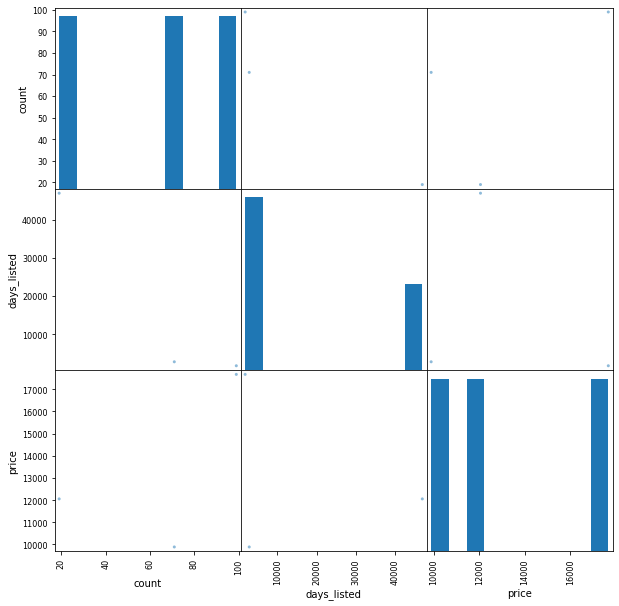

In [71]:
pd.plotting.scatter_matrix(car_trans_type, figsize=(10, 10));

<p><a name="painthist"></a></p>

In [72]:
# analyzing  the average price for categorical value paint_color by calling the pivot table function
average_color =car_sales.pivot_table(index='paint_color', values='price', aggfunc='mean')

In [73]:
paint_color= car_sales.pivot_table(index='paint_color', values='days_listed', aggfunc=['first','count'])
paint_color.columns = ['count', 'days_listed']

In [74]:
paint_color_type= paint_color.join(average_color)

In [75]:
print(paint_color_type.corr())

               count  days_listed     price
count        1.00000    -0.255280  0.522210
days_listed -0.25528     1.000000  0.257294
price        0.52221     0.257294  1.000000


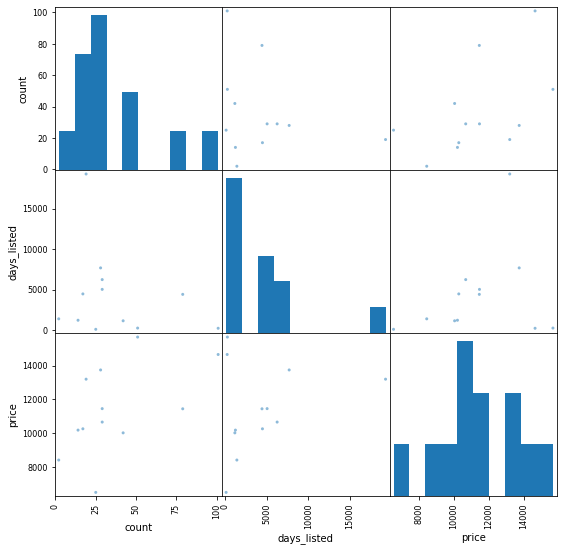

In [76]:
pd.plotting.scatter_matrix(paint_color_type, figsize=(9, 9));

<p><a name="step4conclusion"></a></p>

### Conclusion

the factor the impact the price most is the milage and condition, As mileage increases, for condition, the accident-free car with paint scratches and surface rust might describe it as excellent, whereas most buyers might call it good to average—but it is as important as mileage in assessing value which directly affect the price. the type of vehicle also play a role like the mid price sedans due to its popularity and affordability.

<p><a name="Step 5"></a></p>

### Step 5. Overall conclusion

I therefore conclude that the age, mileage , condition, type variables and categorical variables such astransmission type and color,  has positive corelation in price variable.As mileage and age increases, so does wear and tear,” colors plays and influencing factor while transmission is due to the convenience and driver involment.The cars that has 6 cylinders and with 7 years of age are the one that sells mostly. There are outliers in the data due to some errors made in the listing or because data is not available when the listing was made this makes the data hard to read and is therefore need to be cleaned removed for better readability.